In [1]:
import sys
sys.path.insert(0, "../..")

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from logistic_regression import LogisticRegressionNesterov
from extrapolation import *
from experiments import OnlineExperiment

In [3]:
device = "cpu"

X = []
with open("../../../madelon_train.data") as f:
    for line in f:
        X.append([float(x) for x in line.split()])
X = np.array(X)
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
X = torch.tensor(X, device=device)
with open("../../../madelon_train.labels") as f:
    y = [int(x) for x in f]
y = torch.tensor(y, device=device)
X.shape, y.shape

(torch.Size([2000, 501]), torch.Size([2000]))

In [4]:
np.random.seed(2020)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

$\tau = 10^2$

In [5]:
model = LogisticRegressionNesterov(X_train, y_train, 1e2, device=device)

In [6]:
model.run_steps(50500)

In [7]:
len(model.y_log)

50501

In [8]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5750, dtype=torch.float64)

In [9]:
experiment = OnlineExperiment(model)
k = 6

In [10]:
experiment.run_method("Online RNA", mixing_RNA, k, 50000, method_kwargs={"lambda_": 1e-10, "beta": 0.})

In [11]:
experiment.run_method("Online RNA+mixing", mixing_RNA, k, 50000, method_kwargs={"lambda_": 1e-10, "beta": 0.5})

In [12]:
experiment.run_method("Online RNA+Nesterov", optimal_RNA, k, 50000, 
                      method_kwargs={"lambda_": 1e-10, "alpha": model.alpha, "beta": model.beta})

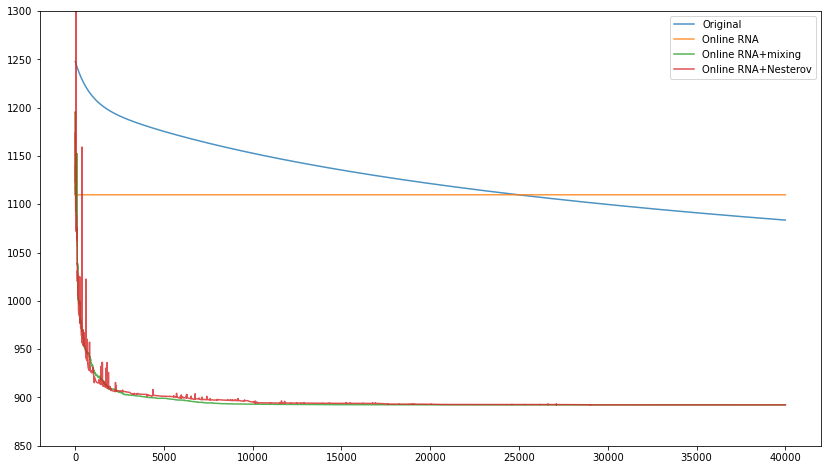

In [13]:
plt.figure(figsize=(14, 8))
experiment.plot_values(n=40000)
plt.ylim(850, 1300)
plt.legend()

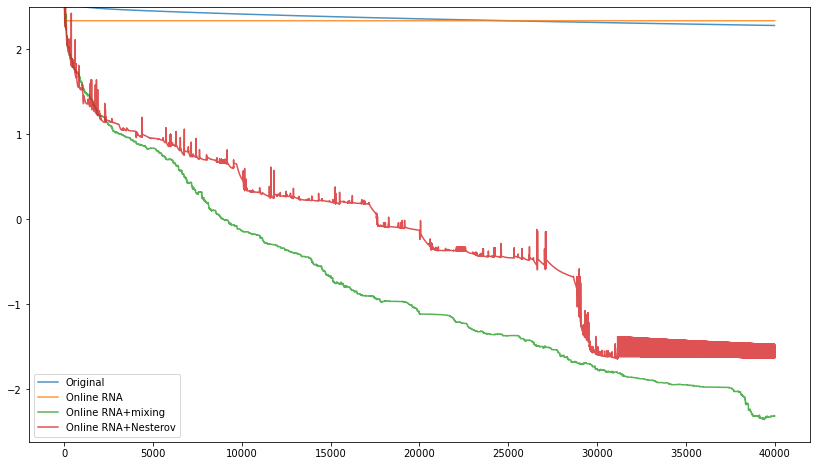

In [14]:
plt.figure(figsize=(14, 8))
experiment.plot_log_diff(n=40000)
plt.ylim(None, 2.5)
plt.legend()

In [15]:
df = experiment.value_df()
df.to_csv("results/madelon-online:tau=1e2.csv")